2it [00:00, 16.32it/s]

(40, 12)


3554it [04:04, 16.27it/s]c:\users\tashikmoin\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [09:00, 24.67it/s]c:\users\tashikmoin\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [09:00, 27.92it/s]c:\users\tashikmoin\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [09:23, 15.51it/s]


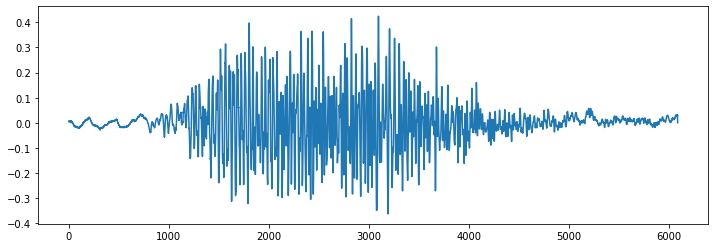

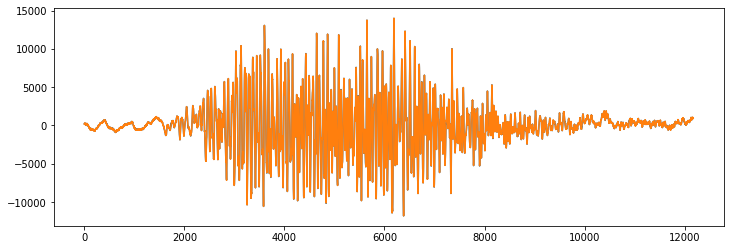

In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import pandas as pd
import os
audio_file_path='tests/test_dog0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
wave_sample_rate, wave_audio = wav.read(audio_file_path)
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
audio_dataset_path='dataset/audio/'
metadata=pd.read_csv('dataset/metadata/dataset.csv')
metadata.head()

def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.180405,...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Model Creation

In [35]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
num_labels=y.shape[1]

In [38]:
model=Sequential()
###first layer
model.add(Dense(500,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 50

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
140/140 [==============================] - 2s 9ms/step - loss: 7.4501 - accuracy: 0.1281 - val_loss: 2.2757 - val_accuracy: 0.1374

Epoch 00001: val_loss improved from inf to 2.27574, saving model to saved_models\audio_classification.hdf5
Epoch 2/1000
140/140 [==============================] - 1s 6ms/step - loss: 2.4099 - accuracy: 0.1426 - val_loss: 2.2318 - val_accuracy: 0.1505

Epoch 00002: val_loss improved from 2.27574 to 2.23181, saving model to saved_models\audio_classification.hdf5
Epoch 3/1000
140/140 [==============================] - 1s 7ms/step - loss: 2.2682 - accuracy: 0.1635 - val_loss: 2.1689 - val_accuracy: 0.1671

Epoch 00003: val_loss improved from 2.23181 to 2.16893, saving model to saved_models\audio_classification.hdf5
Epoch 4/1000
140/140 [==============================] - 1s 7ms/step - loss: 2.2041 - accuracy: 0.1787 - val_loss: 2.1045 - val_accuracy: 0.1992

Epoch 00004: val_loss improved from 2.16893 to 2.10447, saving model to saved_models\audio_


Epoch 00033: val_loss improved from 0.79335 to 0.75797, saving model to saved_models\audio_classification.hdf5
Epoch 34/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.9240 - accuracy: 0.6962 - val_loss: 0.7544 - val_accuracy: 0.7556

Epoch 00034: val_loss improved from 0.75797 to 0.75441, saving model to saved_models\audio_classification.hdf5
Epoch 35/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.8972 - accuracy: 0.7004 - val_loss: 0.7361 - val_accuracy: 0.7687

Epoch 00035: val_loss improved from 0.75441 to 0.73608, saving model to saved_models\audio_classification.hdf5
Epoch 36/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.8860 - accuracy: 0.7074 - val_loss: 0.7255 - val_accuracy: 0.7619

Epoch 00036: val_loss improved from 0.73608 to 0.72547, saving model to saved_models\audio_classification.hdf5
Epoch 37/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.8680 - accuracy: 0.7074 - val_loss: 0.


Epoch 00106: val_loss improved from 0.38574 to 0.38041, saving model to saved_models\audio_classification.hdf5
Epoch 107/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.4324 - accuracy: 0.8551 - val_loss: 0.3781 - val_accuracy: 0.8895

Epoch 00107: val_loss improved from 0.38041 to 0.37809, saving model to saved_models\audio_classification.hdf5
Epoch 108/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.4459 - accuracy: 0.8567 - val_loss: 0.3906 - val_accuracy: 0.8746

Epoch 00108: val_loss did not improve from 0.37809
Epoch 109/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.4665 - accuracy: 0.8533 - val_loss: 0.3950 - val_accuracy: 0.8741

Epoch 00109: val_loss did not improve from 0.37809
Epoch 110/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.4397 - accuracy: 0.8590 - val_loss: 0.3789 - val_accuracy: 0.8821

Epoch 00110: val_loss did not improve from 0.37809
Epoch 111/1000
140/140 [============

140/140 [==============================] - 1s 6ms/step - loss: 0.3435 - accuracy: 0.8868 - val_loss: 0.3335 - val_accuracy: 0.9067

Epoch 00186: val_loss did not improve from 0.33280
Epoch 187/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3631 - accuracy: 0.8852 - val_loss: 0.3291 - val_accuracy: 0.8924

Epoch 00187: val_loss improved from 0.33280 to 0.32907, saving model to saved_models\audio_classification.hdf5
Epoch 188/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.3759 - accuracy: 0.8797 - val_loss: 0.3293 - val_accuracy: 0.8947

Epoch 00188: val_loss did not improve from 0.32907
Epoch 189/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3532 - accuracy: 0.8860 - val_loss: 0.3502 - val_accuracy: 0.9010

Epoch 00189: val_loss did not improve from 0.32907
Epoch 190/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3386 - accuracy: 0.8936 - val_loss: 0.3464 - val_accuracy: 0.8912

Epoch 00190: val


Epoch 00226: val_loss did not improve from 0.31839
Epoch 227/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.3342 - accuracy: 0.8976 - val_loss: 0.3568 - val_accuracy: 0.8912

Epoch 00227: val_loss did not improve from 0.31839
Epoch 228/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3312 - accuracy: 0.8959 - val_loss: 0.3327 - val_accuracy: 0.9050

Epoch 00228: val_loss did not improve from 0.31839
Epoch 229/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3188 - accuracy: 0.9014 - val_loss: 0.3365 - val_accuracy: 0.8987

Epoch 00229: val_loss did not improve from 0.31839
Epoch 230/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3055 - accuracy: 0.8995 - val_loss: 0.3508 - val_accuracy: 0.9073

Epoch 00230: val_loss did not improve from 0.31839
Epoch 231/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.3470 - accuracy: 0.8946 - val_loss: 0.3447 - val_accuracy: 0.8981

Epoch 002

140/140 [==============================] - 1s 6ms/step - loss: 0.3175 - accuracy: 0.8991 - val_loss: 0.3217 - val_accuracy: 0.9004

Epoch 00268: val_loss did not improve from 0.31663
Epoch 269/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.3192 - accuracy: 0.9019 - val_loss: 0.3193 - val_accuracy: 0.9056

Epoch 00269: val_loss did not improve from 0.31663
Epoch 270/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.3080 - accuracy: 0.9002 - val_loss: 0.3464 - val_accuracy: 0.8947

Epoch 00270: val_loss did not improve from 0.31663
Epoch 271/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3063 - accuracy: 0.9037 - val_loss: 0.3305 - val_accuracy: 0.9078

Epoch 00271: val_loss did not improve from 0.31663
Epoch 272/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3256 - accuracy: 0.8975 - val_loss: 0.3452 - val_accuracy: 0.9038

Epoch 00272: val_loss did not improve from 0.31663
Epoch 273/1000
140/140 [=

140/140 [==============================] - 1s 6ms/step - loss: 0.2875 - accuracy: 0.9111 - val_loss: 0.3303 - val_accuracy: 0.9078

Epoch 00309: val_loss did not improve from 0.30185
Epoch 310/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3073 - accuracy: 0.9015 - val_loss: 0.3279 - val_accuracy: 0.9038

Epoch 00310: val_loss did not improve from 0.30185
Epoch 311/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3067 - accuracy: 0.9032 - val_loss: 0.3329 - val_accuracy: 0.9027

Epoch 00311: val_loss did not improve from 0.30185
Epoch 312/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.2746 - accuracy: 0.9174 - val_loss: 0.3066 - val_accuracy: 0.9050

Epoch 00312: val_loss did not improve from 0.30185
Epoch 313/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2856 - accuracy: 0.9111 - val_loss: 0.3334 - val_accuracy: 0.8987

Epoch 00313: val_loss did not improve from 0.30185
Epoch 314/1000
140/140 [=

140/140 [==============================] - 1s 6ms/step - loss: 0.2822 - accuracy: 0.9144 - val_loss: 0.3355 - val_accuracy: 0.9050

Epoch 00391: val_loss did not improve from 0.29653
Epoch 392/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2642 - accuracy: 0.9181 - val_loss: 0.3399 - val_accuracy: 0.9090

Epoch 00392: val_loss did not improve from 0.29653
Epoch 393/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2825 - accuracy: 0.9168 - val_loss: 0.3421 - val_accuracy: 0.8998

Epoch 00393: val_loss did not improve from 0.29653
Epoch 394/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2801 - accuracy: 0.9130 - val_loss: 0.3359 - val_accuracy: 0.9061

Epoch 00394: val_loss did not improve from 0.29653
Epoch 395/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2720 - accuracy: 0.9150 - val_loss: 0.3178 - val_accuracy: 0.9021

Epoch 00395: val_loss did not improve from 0.29653
Epoch 396/1000
140/140 [=

140/140 [==============================] - 1s 6ms/step - loss: 0.2411 - accuracy: 0.9236 - val_loss: 0.3498 - val_accuracy: 0.9096

Epoch 00473: val_loss did not improve from 0.29067
Epoch 474/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2542 - accuracy: 0.9201 - val_loss: 0.3412 - val_accuracy: 0.9056

Epoch 00474: val_loss did not improve from 0.29067
Epoch 475/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2548 - accuracy: 0.9204 - val_loss: 0.3407 - val_accuracy: 0.9113

Epoch 00475: val_loss did not improve from 0.29067
Epoch 476/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2706 - accuracy: 0.9195 - val_loss: 0.3400 - val_accuracy: 0.9101

Epoch 00476: val_loss did not improve from 0.29067
Epoch 477/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.2446 - accuracy: 0.9218 - val_loss: 0.3337 - val_accuracy: 0.9096

Epoch 00477: val_loss did not improve from 0.29067
Epoch 478/1000
140/140 [=

140/140 [==============================] - 1s 4ms/step - loss: 0.2531 - accuracy: 0.9264 - val_loss: 0.3529 - val_accuracy: 0.9084

Epoch 00555: val_loss did not improve from 0.29067
Epoch 556/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2381 - accuracy: 0.9314 - val_loss: 0.3621 - val_accuracy: 0.9010

Epoch 00556: val_loss did not improve from 0.29067
Epoch 557/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2534 - accuracy: 0.9280 - val_loss: 0.3327 - val_accuracy: 0.9170

Epoch 00557: val_loss did not improve from 0.29067
Epoch 558/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2498 - accuracy: 0.9267 - val_loss: 0.3323 - val_accuracy: 0.9124

Epoch 00558: val_loss did not improve from 0.29067
Epoch 559/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2647 - accuracy: 0.9195 - val_loss: 0.3410 - val_accuracy: 0.9107

Epoch 00559: val_loss did not improve from 0.29067
Epoch 560/1000
140/140 [=

140/140 [==============================] - 1s 4ms/step - loss: 0.2395 - accuracy: 0.9309 - val_loss: 0.3465 - val_accuracy: 0.9101

Epoch 00637: val_loss did not improve from 0.29067
Epoch 638/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2484 - accuracy: 0.9280 - val_loss: 0.3561 - val_accuracy: 0.9061

Epoch 00638: val_loss did not improve from 0.29067
Epoch 639/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.9224 - val_loss: 0.3291 - val_accuracy: 0.9164

Epoch 00639: val_loss did not improve from 0.29067
Epoch 640/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2411 - accuracy: 0.9294 - val_loss: 0.3392 - val_accuracy: 0.9118

Epoch 00640: val_loss did not improve from 0.29067
Epoch 641/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2307 - accuracy: 0.9314 - val_loss: 0.3482 - val_accuracy: 0.9107

Epoch 00641: val_loss did not improve from 0.29067
Epoch 642/1000
140/140 [=

140/140 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.9287 - val_loss: 0.3378 - val_accuracy: 0.9073

Epoch 00719: val_loss did not improve from 0.29067
Epoch 720/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2305 - accuracy: 0.9329 - val_loss: 0.3414 - val_accuracy: 0.9078

Epoch 00720: val_loss did not improve from 0.29067
Epoch 721/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2348 - accuracy: 0.9303 - val_loss: 0.3565 - val_accuracy: 0.9084

Epoch 00721: val_loss did not improve from 0.29067
Epoch 722/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2264 - accuracy: 0.9374 - val_loss: 0.3405 - val_accuracy: 0.9199

Epoch 00722: val_loss did not improve from 0.29067
Epoch 723/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2170 - accuracy: 0.9413 - val_loss: 0.3271 - val_accuracy: 0.9170

Epoch 00723: val_loss did not improve from 0.29067
Epoch 724/1000
140/140 [=

140/140 [==============================] - 1s 4ms/step - loss: 0.2258 - accuracy: 0.9366 - val_loss: 0.3444 - val_accuracy: 0.9124

Epoch 00801: val_loss did not improve from 0.29067
Epoch 802/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2390 - accuracy: 0.9337 - val_loss: 0.3284 - val_accuracy: 0.9141

Epoch 00802: val_loss did not improve from 0.29067
Epoch 803/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2310 - accuracy: 0.9294 - val_loss: 0.3346 - val_accuracy: 0.9153

Epoch 00803: val_loss did not improve from 0.29067
Epoch 804/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2415 - accuracy: 0.9291 - val_loss: 0.3445 - val_accuracy: 0.9090

Epoch 00804: val_loss did not improve from 0.29067
Epoch 805/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2235 - accuracy: 0.9341 - val_loss: 0.3599 - val_accuracy: 0.9073

Epoch 00805: val_loss did not improve from 0.29067
Epoch 806/1000
140/140 [=

140/140 [==============================] - 1s 5ms/step - loss: 0.2363 - accuracy: 0.9287 - val_loss: 0.3610 - val_accuracy: 0.9130

Epoch 00883: val_loss did not improve from 0.29067
Epoch 884/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2285 - accuracy: 0.9333 - val_loss: 0.3327 - val_accuracy: 0.9159

Epoch 00884: val_loss did not improve from 0.29067
Epoch 885/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2167 - accuracy: 0.9350 - val_loss: 0.3492 - val_accuracy: 0.9136

Epoch 00885: val_loss did not improve from 0.29067
Epoch 886/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.1947 - accuracy: 0.9399 - val_loss: 0.3513 - val_accuracy: 0.9170

Epoch 00886: val_loss did not improve from 0.29067
Epoch 887/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2222 - accuracy: 0.9400 - val_loss: 0.3434 - val_accuracy: 0.9107

Epoch 00887: val_loss did not improve from 0.29067
Epoch 888/1000
140/140 [=

140/140 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9374 - val_loss: 0.3579 - val_accuracy: 0.9124

Epoch 00965: val_loss did not improve from 0.29067
Epoch 966/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2338 - accuracy: 0.9383 - val_loss: 0.3536 - val_accuracy: 0.9113

Epoch 00966: val_loss did not improve from 0.29067
Epoch 967/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9356 - val_loss: 0.3648 - val_accuracy: 0.9181

Epoch 00967: val_loss did not improve from 0.29067
Epoch 968/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.2149 - accuracy: 0.9350 - val_loss: 0.3381 - val_accuracy: 0.9181

Epoch 00968: val_loss did not improve from 0.29067
Epoch 969/1000
140/140 [==============================] - 1s 4ms/step - loss: 0.2155 - accuracy: 0.9390 - val_loss: 0.3586 - val_accuracy: 0.9193

Epoch 00969: val_loss did not improve from 0.29067
Epoch 970/1000
140/140 [=

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9141384959220886


In [48]:
filename="tests/test_childrenplay0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.3710762e+02  8.3305443e+01 -6.8262817e+01  3.2430061e+01
 -1.5760985e+01  5.0360260e+00 -1.4178017e+01  6.8758984e+00
  1.5025976e+00 -1.1992622e+01 -2.8097615e+00  2.2380594e+01
 -9.4585447e+00 -2.3872155e-01 -4.4718695e+00  3.6893067e+00
 -4.4111514e+00  2.4554980e+00 -5.6874247e+00 -3.7479608e+00
 -4.1549158e+00  1.0180766e+01  3.2225592e+00  2.0709116e+00
 -3.7253852e+00 -1.5346245e-01  4.5417762e+00  1.8417475e+00
 -6.8128147e+00  4.4453984e-01  3.5543990e+00  1.8905276e+00
  6.3908499e-01 -2.4118891e+00  6.8140310e-01 -3.8383472e+00
  1.0076929e+00  4.0431581e+00 -2.8989244e+00  1.7436763e+00]
[[-2.3710762e+02  8.3305443e+01 -6.8262817e+01  3.2430061e+01
  -1.5760985e+01  5.0360260e+00 -1.4178017e+01  6.8758984e+00
   1.5025976e+00 -1.1992622e+01 -2.8097615e+00  2.2380594e+01
  -9.4585447e+00 -2.3872155e-01 -4.4718695e+00  3.6893067e+00
  -4.4111514e+00  2.4554980e+00 -5.6874247e+00 -3.7479608e+00
  -4.1549158e+00  1.0180766e+01  3.2225592e+00  2.0709116e+00
  -3.7253852e+00 

array(['children_playing'], dtype='<U16')